# Zbiory danych w PyTorch

W tej sekcji pokażemy, jak:
* wczytywać dane z zewnętrznych plików
* budować losowe partie przy użyciu narzędzi <a href='https://pytorch.org/docs/stable/data.html'><strong><tt>data</tt></strong></a> w PyTorch<br>

Na końcu krótko wspomnimy o <a href='https://pytorch.org/docs/stable/torchvision/index.html'><tt><strong>torchvision</strong></tt></a>.


In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Wczytywanie danych z plików
Widzieliśmy już, jak ładować tablice NumPy do PyTorcha, a każdy, kto zna <tt>pandas.read_csv()</tt>, może użyć go do przygotowania danych przed utworzeniem tensorów. 

Tutaj wczytamy <a href='https://en.wikipedia.org/wiki/Iris_flower_data_set'>zbiór danych irysów</a> zapisany w pliku .csv.

Zbiór **Iris** zawiera po 50 próbek dla trzech gatunków irysów (*Iris setosa*, *Iris virginica* i *Iris versicolor*), co daje łącznie **150 obserwacji**.  

Dysponujemy czterema cechami:  
- długość działki kielicha (*sepal length*)  
- szerokość działki kielicha (*sepal width*)  
- długość płatka (*petal length*)  
- szerokość płatka (*petal width*)  

Etykiety klas (*target*):  
- `0` – *Iris setosa*  
- `1` – *Iris virginica*  
- `2` – *Iris versicolor*  



In [3]:
df = pd.read_csv('../Data/iris.csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [4]:
df.shape

(150, 5)

### Rysowanie danych


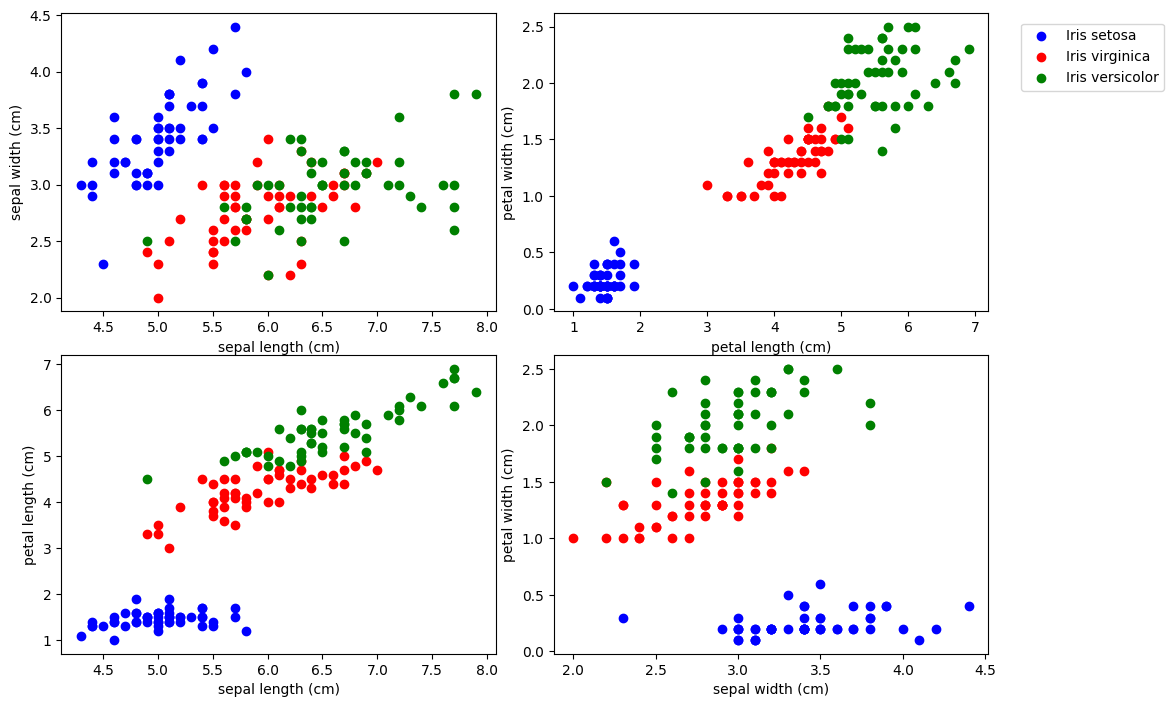

In [5]:
# Tworzymy układ 2x2 wykresów (4 subploty obok siebie)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

# Definiujemy pary indeksów kolumn, które będziemy rysować względem siebie
# (np. (0,1) oznacza: oś X = kolumna 0, oś Y = kolumna 1)
plots = [(0,1), (2,3), (0,2), (1,3)]

# Kolory dla trzech klas irysów
colors = ['b', 'r', 'g']

# Etykiety klas (będą użyte w legendzie)
labels = ['Iris setosa','Iris virginica','Iris versicolor']

# Iterujemy po każdej osi (subplot) i rysujemy odpowiedni scatter
for i, ax in enumerate(axes.flat):
    # Dla każdej z 3 klas (0,1,2)
    for j in range(3):
        # Pobieramy nazwy kolumn (np. "sepal length (cm)", "petal width (cm)")
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        # Rysujemy punkty tylko dla obserwacji z klasą j
        ax.scatter(
            df[df['target']==j][x],
            df[df['target']==j][y],
            color=colors[j]
        )
        # Ustawiamy podpisy osi
        ax.set(xlabel=x, ylabel=y)

# Dodajemy wspólną legendę dla wszystkich subplotów
fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))

# Wyświetlamy wykres
plt.show()


## Klasyczna metoda budowania tensorów train/test

Zanim wprowadzimy klasy Dataset i DataLoader PyTorcha, rzućmy okiem na alternatywne - klasyczne podejście.

In [7]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [8]:
features = df.drop("target", axis=1)
features

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
labels = df[["target"]]
# labels.values

In [11]:
from sklearn.model_selection import train_test_split

# Podział danych na zbiór treningowy i testowy (80% / 20%)
train_X, test_X, train_y, test_y = train_test_split(
    features.values,
    labels.values,
    test_size=0.2,
    random_state=33
)
train_X[:5], train_y[:5]

(array([[5.6, 2.7, 4.2, 1.3],
        [6.7, 3.1, 4.7, 1.5],
        [5.6, 2.8, 4.9, 2. ],
        [6.4, 3.2, 5.3, 2.3],
        [6.7, 3.1, 5.6, 2.4]]),
 array([[1.],
        [1.],
        [2.],
        [2.],
        [2.]]))

In [12]:
# Konwersja danych wejściowych do tensora typu float (PyTorch)
X_train = torch.FloatTensor(train_X)
X_test = torch.FloatTensor(test_X)

X_test

tensor([[5.7000, 2.9000, 4.2000, 1.3000],
        [6.7000, 3.1000, 4.4000, 1.4000],
        [4.7000, 3.2000, 1.6000, 0.2000],
        [6.5000, 2.8000, 4.6000, 1.5000],
        [6.1000, 2.6000, 5.6000, 1.4000],
        [6.3000, 3.3000, 6.0000, 2.5000],
        [4.8000, 3.4000, 1.9000, 0.2000],
        [5.1000, 3.5000, 1.4000, 0.3000],
        [6.4000, 3.1000, 5.5000, 1.8000],
        [6.9000, 3.2000, 5.7000, 2.3000],
        [6.8000, 3.2000, 5.9000, 2.3000],
        [4.4000, 3.0000, 1.3000, 0.2000],
        [6.3000, 3.4000, 5.6000, 2.4000],
        [6.1000, 2.9000, 4.7000, 1.4000],
        [6.9000, 3.1000, 5.1000, 2.3000],
        [6.4000, 2.9000, 4.3000, 1.3000],
        [6.0000, 3.0000, 4.8000, 1.8000],
        [5.2000, 3.5000, 1.5000, 0.2000],
        [6.3000, 3.3000, 4.7000, 1.6000],
        [7.2000, 3.2000, 6.0000, 1.8000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [5.7000, 3.8000, 1.7000, 0.3000],
        [6.5000, 3.0000, 5.8000, 2.2000],
        [4.8000, 3.0000, 1.4000, 0

In [13]:
# Konwersja etykiet do tensora typu long (wymagany przez CrossEntropyLoss)
# reshape(-1, 1) → przekształcamy na wektor kolumnowy

y_train = torch.LongTensor(train_y)
y_test = torch.LongTensor(test_y)
y_test

tensor([[1],
        [1],
        [0],
        [1],
        [2],
        [2],
        [0],
        [0],
        [2],
        [2],
        [2],
        [0],
        [2],
        [1],
        [2],
        [1],
        [2],
        [0],
        [1],
        [2],
        [0],
        [0],
        [2],
        [0],
        [2],
        [2],
        [1],
        [1],
        [2],
        [2]])

In [14]:
print(f'Training size: {len(y_train)}')
labels, counts = y_train.unique(return_counts=True)
print(f'Labels: {labels}\nCounts: {counts}')

Training size: 120
Labels: tensor([0, 1, 2])
Counts: tensor([42, 42, 36])


<div class="alert alert-success"><strong>UWAGA:</strong> Znaczenie zbalansowanego zbioru treningowego zostało omówione w pracy <em>A systematic study of the class imbalance problem in convolutional neural networks</em> autorstwa Mateusza Budy, Atsuto Makiego i Macieja A. Mazurowskiego (15.10.2017, ostatnia rewizja 13.10.2018) <a href='https://arxiv.org/abs/1710.05381'>https://arxiv.org/abs/1710.05381</a><br>Autorzy pokazują na przykład, że nadpróbkowanie rzadziej występującej klasy tak, aby dorównała częstszym klasom, jest zawsze najlepszym rozwiązaniem.</div>


In [15]:
X_train.size()

torch.Size([120, 4])

In [16]:
y_train.size()

torch.Size([120, 1])

<div class="alert alert-info"><strong>UWAGA:</strong> To do nas należy pamiętanie, które kolumny odpowiadają konkretnym cechom.</div>


## Korzystanie z klas `Dataset` i `DataLoader` w PyTorchu

Znacznie lepszym rozwiązaniem niż ręczne zarządzanie danymi jest wykorzystanie klas  
[`Dataset`](https://pytorch.org/docs/stable/data.html) oraz  
[`DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader).  

Zazwyczaj, aby przygotować **Dataset** dopasowany do konkretnego zadania, definiujemy własną klasę dziedziczącą po `torch.utils.data.Dataset`  

W tym przypadku możemy jednak skorzystać z wbudowanej klasy [`TensorDataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.TensorDataset).


In [19]:
from torch.utils.data import TensorDataset, DataLoader

df = pd.read_csv('../Data/iris.csv')

X = df.drop('target',axis=1).values
y = df['target'].values

iris = TensorDataset(torch.FloatTensor(X),torch.LongTensor(y))
iris

Alternatywnie można zdefiniować klasę Dataset - daje to więcej kontroli nad tym co robimy. W tym przypadku nie jest to jednak niezbędne.

In [20]:
from torch.utils.data import Dataset, DataLoader

class IrisDataset(Dataset):
    def __init__(self, dataframe):
        self.X = torch.FloatTensor(dataframe.drop('target', axis=1).values)
        self.y = torch.LongTensor(dataframe['target'].values)

    def __len__(self):
        return len(self.X)  # liczba próbek

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]  # zwraca pojedyńczą próbkę

# Użycie:
iris_dataset = IrisDataset(df)



Kiedy mamy przygotowany `Dataset`, możemy przekazać go do `DataLoadera`.

### Co daje `DataLoader`?

1. **Batchowanie danych**

   * zamiast podawać pojedyncze próbki, możemy trenować sieć na paczkach danych (*mini-batches*).
   * ustawiamy to parametrem `batch_size`.

2. **Mieszanie kolejności (shuffling)**

   * przy każdej epoce dane mogą być tasowane (`shuffle=True`), co zapobiega uczeniu się kolejności próbek.

3. **Sampler**

   * pod spodem `DataLoader` korzysta z obiektu `Sampler`, który decyduje, *jak* pobierane są indeksy danych.
   * domyślnie jest to losowe próbkowanie przy `shuffle=True`.
   * można też stworzyć własny sampler (np. do zbalansowania klas).

4. **Wieloprocesowość (num_workers)**

   * dane mogą być wczytywane w wielu procesach równolegle (`num_workers>0`).
   * to ważne przy dużych datasetach (np. obrazach), bo przygotowanie batcha nie blokuje trenowania modelu.

5. **Łatwe iterowanie**

   * `DataLoader` zwraca iteratory zgodne z Pythonem (`for xb, yb in loader:`), więc integracja z pętlą treningową jest prosta i czytelna.

---

### Przykład

In [21]:
from torch.utils.data import DataLoader

iris_loader_1 = DataLoader(
    iris_dataset,     # nasz Dataset
    batch_size=16,    # rozmiar batcha
    shuffle=True,     # tasowanie co epokę
    num_workers=0     # wczytywanie w wielu procesach. W notatniku to jednak nie zadziałą dobrze. 
)

for xb, yb in iris_loader_1:
    print(xb.shape, yb.shape)
    break

torch.Size([16, 4]) torch.Size([16])


🔎 Ten fragment kodu pokazuje, że zamiast zwracać jeden przykład, dostajemy batch o wymiarach `(16, liczba_cech)` dla `X` i `(16,)` dla `y`.

---

👉 Można więc powiedzieć, że **`Dataset` definiuje *co* to są dane, a `DataLoader` definiuje *jak* je pobierać w trakcie trenowania**.


In [22]:
iris_loader_2 = DataLoader(iris, batch_size=105, shuffle=True)
for xb, yb in iris_loader_2:
    print(xb.shape, yb.shape)
    break

torch.Size([105, 4]) torch.Size([105])


In [23]:
for line in iris_loader_1:
    print(line)
    break

[tensor([[5.0000, 3.6000, 1.4000, 0.2000],
        [6.4000, 2.8000, 5.6000, 2.2000],
        [4.6000, 3.2000, 1.4000, 0.2000],
        [6.7000, 3.1000, 4.7000, 1.5000],
        [6.5000, 3.0000, 5.2000, 2.0000],
        [5.1000, 3.5000, 1.4000, 0.2000],
        [5.4000, 3.7000, 1.5000, 0.2000],
        [6.9000, 3.2000, 5.7000, 2.3000],
        [5.4000, 3.9000, 1.7000, 0.4000],
        [5.1000, 3.8000, 1.5000, 0.3000],
        [5.9000, 3.0000, 5.1000, 1.8000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [6.5000, 2.8000, 4.6000, 1.5000],
        [5.8000, 2.8000, 5.1000, 2.4000],
        [6.4000, 2.9000, 4.3000, 1.3000],
        [5.0000, 2.0000, 3.5000, 1.0000]]), tensor([0, 2, 0, 1, 2, 0, 0, 2, 0, 0, 2, 0, 1, 2, 1, 1])]


In [18]:
line[1]

tensor([2, 0, 1, 0, 0, 2, 1, 1, 1, 2, 1, 0, 0, 2, 1, 0])

In [19]:
line[1].bincount()

tensor([6, 6, 4])

## Krótka wzmianka o Torchvision
PyTorch oferuje kolejne potężne narzędzie do pracy ze zbiorami danych – <a href='https://pytorch.org/docs/stable/torchvision/index.html'><tt><strong>torchvision</strong></tt></a>, przydatne podczas pracy z obrazami.

Warto wiedzieć, że torchvision udostępnia wbudowane zbiory obrazów, takie jak <a href='https://en.wikipedia.org/wiki/MNIST_database'>MNIST</a> i <a href='https://en.wikipedia.org/wiki/CIFAR-10'>CIFAR-10</a>, a także narzędzia do konwersji obrazów na tensory.
